In [3]:
from sympy import symbols
from sympy.physics.mechanics import ReferenceFrame,Point,dynamicsymbols
import sys
sys.path.append('../tools')
from vis import Visualizer
import numpy as np
%matplotlib notebook

<IPython.core.display.Javascript object>


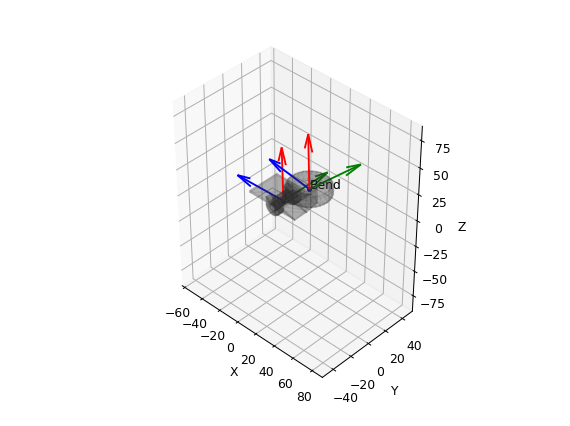

In [28]:
#Parámetros del modelo
h,d=symbols('h,d')
q1,q2=dynamicsymbols('q1,q2')

# Parámetros del modelo
h,d,mb,mc,Ia,Ir,g=symbols('h,d,mb,mc,Ia,Ir,g')

#Marcos de referencia
a=ReferenceFrame('A')
b=a.orientnew('B','Axis',(q1,-a.y))
c=b.orientnew('C','Axis',(q2,b.x))

# Puntos de interés
o=Point('O')
b_com=o.locatenew('Bcom',-h*b.z/2)
b_end=o.locatenew('Bend',-h*b.z+d*b.x)
c_com=b_end.locatenew('Ccom',0)

# Construya un objecto de visualizacion con el marco de referencia inercial y punto de origen
vis=Visualizer(a,o)
# Agrege marcos y puntos para ser visualizados (marco,punto,geometría)
vis.add(a,o,shape='assets/Tren_de_aterrizaje_base.stl')
vis.add(b,o,shape='assets/Tren_de_aterrizaje_lever.stl')
vis.add(c,b_end,shape='assets/Tren_de_aterrizaje_wheel.stl')
vis.add(b,o,frame_scale=50)
vis.add(c,b_end,frame_scale=50)

# Modifique las variables de movimiento y observe el cambio en la posicion y
# orientacion de los marcos de referencia
vis.plot({h:28,d:25,q1:0,q2:0})

In [29]:
#Modifique las variables de movimiento para cambiar la configuracion cinematica del modelo
#Puede hacerlo desde esta celda para actualizar el modelo sin tener que volver a generar la figura.
vis.plot({h:28,d:25,q1:0.5,q2:0.8})

In [35]:
#Esto permite crear animaciones facilmente
#Ejecute esta celda y de click en la figura 1 para observar la animación del movimiento.
import matplotlib
from matplotlib.animation import FuncAnimation
tt=np.linspace(0,10,250)
qq1=1+np.sin(2*np.pi*0.1*tt)
qq2=tt*2*np.pi

def animfunc(i,qq1,qq2):
    print(i)
    vis.plot({h:28,d:25,q1:qq1[i],q2:qq2[i]})    

anim=FuncAnimation(vis.fig,animfunc,fargs=(qq1,qq2),interval=10)
